In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
#import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo
import cufflinks
cufflinks.go_offline(connected=True)
pyo.init_notebook_mode(connected=True)

import folium

In [2]:
df = pd.read_csv("covid_19_data.csv", parse_dates=['Last Update'])
df.rename(columns={'Country/Region':'Country'}, inplace=True)
#df = df.drop(columns = ['SNo', "ObservationDate"])

In [3]:
#strip white spaces are there is one country (Azerbaijan) with a whitespace observation
df['Country'] = df['Country'].str.strip()
#fill missing Province/State with Country
df.loc[df['Province/State'].isnull(), 'Province/State'] = df.loc[df['Province/State'].isnull(), 'Country']

### Keeping the recent row for every country

In [4]:
#keep most recent line per Province/State and Country
df.sort_values(['Country', 'Province/State', 'ObservationDate'], ascending = [True,True,False], inplace = True)
df = df.drop_duplicates(['Country', 'Province/State'], keep = "first")

In [5]:
#keep a copy for later on
df_state = df.copy()

df = df.drop(columns = "ObservationDate")


In [6]:
df

,SNo,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
4674,4675,"('St. Martin',)","('St. Martin',)",2020-03-10 05:33:02,2.0,0.0,0.0
116062,116063,Afghanistan,Afghanistan,2020-09-24 04:23:38,39145.0,1446.0,32610.0
116063,116064,Albania,Albania,2020-09-24 04:23:38,12787.0,370.0,7139.0
116064,116065,Algeria,Algeria,2020-09-24 04:23:38,50400.0,1698.0,35428.0
116065,116066,Andorra,Andorra,2020-09-24 04:23:38,1753.0,53.0,1203.0
...,...,...,...,...,...,...,...
116226,116227,Western Sahara,Western Sahara,2020-09-24 04:23:38,10.0,1.0,8.0
116227,116228,Yemen,Yemen,2020-09-24 04:23:38,2029.0,586.0,1245.0
116228,116229,Zambia,Zambia,2020-09-24 04:23:38,14443.0,332.0,13629.0
116229,116230,Zimbabwe,Zimbabwe,2020-09-24 04:23:38,7725.0,227.0,6007.0


In [7]:
#groupby Country
df_country = df.groupby(['Country'], as_index=False)['Confirmed', 'Deaths'].sum()
df_country

<ipython-input-7-cede070f562f>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Deaths
0,"('St. Martin',)",2.0,0.0
1,Afghanistan,39145.0,1446.0
2,Albania,12787.0,370.0
3,Algeria,50400.0,1698.0
4,Andorra,1753.0,53.0
...,...,...,...
217,Western Sahara,10.0,1.0
218,Yemen,2029.0,586.0
219,Zambia,14443.0,332.0
220,Zimbabwe,7725.0,227.0


In [8]:
countries = pd.read_csv("countries_by_population_2019.csv")
countries_iso = pd.read_csv("country_codes_2020.csv")
countries

,Rank,name,pop2019,pop2018,GrowthRate,area,Density
0,1,China,1433783.686,NaN,1.0039,9706961.00,147.7068
1,2,India,1366417.754,NaN,1.0099,3287590.00,415.6290
2,3,United States,329064.917,NaN,1.0059,9372610.00,35.1092
3,4,Indonesia,270625.568,NaN,1.0107,1904569.00,142.0928
4,5,Pakistan,216565.318,NaN,1.0200,881912.00,245.5634
...,...,...,...,...,...,...,...
227,228,Montserrat,4.989,NaN,1.0006,102.00,48.9118
228,229,Falkland Islands,3.377,NaN,1.0305,12173.00,0.2774
229,230,Niue,1.615,NaN,1.0068,260.00,6.2115
230,231,Tokelau,1.340,NaN,1.0127,12.00,111.6667


In [9]:
countries = countries[['name','pop2019']]
countries

,name,pop2019
0,China,1433783.686
1,India,1366417.754
2,United States,329064.917
3,Indonesia,270625.568
4,Pakistan,216565.318
...,...,...
227,Montserrat,4.989
228,Falkland Islands,3.377
229,Niue,1.615
230,Tokelau,1.340


In [10]:
#add ISO Alpha 3 code 
countries = countries.merge(countries_iso[['name', 'cca3']], on = ['name'], how = "left")
countries

,name,pop2019,cca3
0,China,1433783.686,CHN
1,India,1366417.754,IND
2,United States,329064.917,USA
3,Indonesia,270625.568,IDN
4,Pakistan,216565.318,PAK
...,...,...,...
227,Montserrat,4.989,MSR
228,Falkland Islands,3.377,FLK
229,Niue,1.615,NIU
230,Tokelau,1.340,TKL


In [11]:
cols_to_rename = {'name': 'Country', 'pop2019': 'Population', 'cca3': 'ISO'}
countries = countries.rename(columns = cols_to_rename)


In [12]:
#just fixing the most important mismatches
countries_to_rename = {'US': 'United States',\
                       'Mainland China': 'China',\
                       'UK': 'United Kingdom',\
                       'Congo (Kinshasa)': 'DR Congo',\
                       'North Macedonia': 'Macedonia',\
                       'Republic of Ireland': 'Ireland',\
                       'Congo (Brazzaville)': 'Republic of the Congo'}

df_country['Country'] = df_country['Country'].replace(countries_to_rename)

In [13]:
#merging with the countries dataframe
df_country = df_country.merge(countries, on = "Country", how = "left")
df_country

,Country,Confirmed,Deaths,Population,ISO
0,"('St. Martin',)",2.0,0.0,NaN,NaN
1,Afghanistan,39145.0,1446.0,38041.754,AFG
2,Albania,12787.0,370.0,2880.917,ALB
3,Algeria,50400.0,1698.0,43053.054,DZA
4,Andorra,1753.0,53.0,77.142,AND
...,...,...,...,...,...
217,Western Sahara,10.0,1.0,582.463,ESH
218,Yemen,2029.0,586.0,29161.922,YEM
219,Zambia,14443.0,332.0,17861.030,ZMB
220,Zimbabwe,7725.0,227.0,14645.468,ZWE


In [14]:
df_country.isnull().sum()
#we can drop the null values
df_country = df_country.dropna()

In [15]:
#rounding population to millions with 2 digits, and creating two new columns
df_country['Population'] = round((df_country['Population']/1000),2)
df_country = df_country.rename(columns = {'Population': 'Population (million)'})

In [16]:
df_country['Cases per Million'] = round((df_country['Confirmed']/df_country['Population (million)']),2)
df_country['Deaths per Million'] = round((df_country['Deaths']/df_country['Population (million)']),2)

In [17]:
df_country = df_country[(df_country['Population (million)'] > 1)]

In [18]:
df_country = df_country.sort_values(['Cases per Million'], ascending = False).reset_index(drop=True)
df_country.drop(columns = ['ISO', 'Deaths', 'Deaths per Million']).sort_values('Confirmed',ascending=False).head(10).style.background_gradient(cmap='Reds', subset = ['Cases per Million'])

,Country,Confirmed,Population (million),Cases per Million
8,United States,6934236.000000,329.060000,21072.860000
52,India,5922178.000000,1366.420000,4334.080000
7,Brazil,4863249.000000,211.050000,23043.110000
20,Russia,1523330.000000,145.870000,10443.070000
9,Spain,922247.000000,46.740000,19731.430000
2,Peru,912451.000000,32.510000,28066.780000
12,Colombia,808372.000000,50.340000,16058.240000
41,Mexico,710049.000000,127.580000,5565.520000
19,United Kingdom,707408.000000,67.530000,10475.460000
18,South Africa,665188.000000,58.560000,11359.080000


In [19]:
df_conf = pd.read_csv("time_series_covid_19_confirmed.csv")


In [20]:
df_conf.rename(columns={'Country/Region':'Country'},inplace=1)

In [21]:
df_conf.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

In [22]:
df_conf

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145
1,Albania,0,0,0,0,0,0,0,0,0,...,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787
2,Algeria,0,0,0,0,0,0,0,0,0,...,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400
3,Andorra,0,0,0,0,0,0,0,0,0,...,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753
4,Angola,0,0,0,0,0,0,0,0,0,...,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,31362,32250,33006,33843,34401,35003,35686,36151,36580,37083
262,Western Sahara,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,Yemen,0,0,0,0,0,0,0,0,0,...,2013,2016,2019,2022,2024,2026,2026,2028,2028,2029
264,Zambia,0,0,0,0,0,0,0,0,0,...,13720,13819,13887,13928,14022,14070,14131,14175,14389,14443


In [23]:
top_10 = df_conf.sort_values(['9/23/20'],ascending=False).head(10)
top_10

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
242,US,1,1,2,2,5,5,5,6,6,...,6553652,6592342,6630051,6674411,6723933,6768119,6804814,6856884,6896218,6933548
143,India,0,0,0,0,0,0,0,0,1,...,4930236,5020359,5118253,5214677,5308014,5400619,5487580,5562663,5562663,5646010
30,Brazil,0,0,0,0,0,0,0,0,0,...,4345610,4382263,4419083,4455386,4495183,4528240,4544629,4558040,4591364,4591364
208,Russia,0,0,0,0,0,0,0,0,0,...,1064438,1069873,1075485,1081152,1086955,1092915,1098958,1105048,1111157,1117487
89,Colombia,0,0,0,0,0,0,0,0,0,...,721892,728590,736377,743945,750471,758398,765076,770435,777537,784268
202,Peru,0,0,0,0,0,0,0,0,0,...,729619,733860,738020,744400,750098,756412,762865,768895,768895,776546
177,Mexico,0,0,0,0,0,0,0,0,0,...,671716,676487,680931,684113,688954,694121,697663,700580,705263,710049
226,Spain,0,0,0,0,0,0,0,0,0,...,593730,603167,614360,625651,640040,640040,640040,671468,682267,693556
224,South Africa,0,0,0,0,0,0,0,0,0,...,650749,651521,653444,655572,657627,659656,661211,661936,663282,665188
6,Argentina,0,0,0,0,0,0,0,0,0,...,565446,577338,589012,601713,613658,622934,631365,640147,652174,664799


In [24]:
top_count = df_conf.groupby(['Country']).sum()
top_count

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145
Albania,0,0,0,0,0,0,0,0,0,0,...,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787
Algeria,0,0,0,0,0,0,0,0,0,0,...,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400
Andorra,0,0,0,0,0,0,0,0,0,0,...,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753
Angola,0,0,0,0,0,0,0,0,0,0,...,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,31362,32250,33006,33843,34401,35003,35686,36151,36580,37083
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,2013,2016,2019,2022,2024,2026,2026,2028,2028,2029


In [25]:
top_count = top_count.sort_values(by=['9/23/20'],ascending=False).head(10)
top_count

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
Country,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,6553652,6592342,6630051,6674411,6723933,6768119,6804814,6856884,6896218,6933548
India,0,0,0,0,0,0,0,0,1,1,...,4930236,5020359,5118253,5214677,5308014,5400619,5487580,5562663,5562663,5646010
Brazil,0,0,0,0,0,0,0,0,0,0,...,4345610,4382263,4419083,4455386,4495183,4528240,4544629,4558040,4591364,4591364
Russia,0,0,0,0,0,0,0,0,0,2,...,1064438,1069873,1075485,1081152,1086955,1092915,1098958,1105048,1111157,1117487
Colombia,0,0,0,0,0,0,0,0,0,0,...,721892,728590,736377,743945,750471,758398,765076,770435,777537,784268
Peru,0,0,0,0,0,0,0,0,0,0,...,729619,733860,738020,744400,750098,756412,762865,768895,768895,776546
Mexico,0,0,0,0,0,0,0,0,0,0,...,671716,676487,680931,684113,688954,694121,697663,700580,705263,710049
Spain,0,0,0,0,0,0,0,0,0,0,...,593730,603167,614360,625651,640040,640040,640040,671468,682267,693556
South Africa,0,0,0,0,0,0,0,0,0,0,...,650749,651521,653444,655572,657627,659656,661211,661936,663282,665188


# Trend of Covid-19 cases among badly hit countries[till september 2020]

In [26]:
top_count.transpose().iplot()

In [28]:
df_country = df_country.sort_values(['Cases per Million'], ascending = False).reset_index(drop=True)
df_country.drop(columns = ['ISO', 'Deaths', 'Deaths per Million']).head(10).style.background_gradient(cmap='Reds', subset = ['Cases per Million'])

,Country,Confirmed,Population (million),Cases per Million
0,Qatar,124175.000000,2.830000,43878.090000
1,Bahrain,67014.000000,1.640000,40862.200000
2,Peru,912451.000000,32.510000,28066.780000
3,Chile,499482.000000,18.950000,26357.890000
4,Panama,107990.000000,4.250000,25409.410000
5,Kuwait,101299.000000,4.210000,24061.520000
6,Israel,204691.000000,8.520000,24024.770000
7,Brazil,4863249.000000,211.050000,23043.110000
8,United States,6934236.000000,329.060000,21072.860000
9,Spain,922247.000000,46.740000,19731.430000


# World map with Cases per Million for each country

## Hover over the map to see the info. Plotted using plotly

In [29]:
fig = px.choropleth(df_country, locations="ISO",
                    color="Cases per Million",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona confirmed cases per million inhabitants",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 750,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

In [30]:
df_country[df_country.Country=='India']

,Country,Confirmed,Deaths,Population (million),ISO,Cases per Million,Deaths per Million
52,India,5922178.0,97770.0,1366.42,IND,4334.08,71.55


# World map with Deaths per Million for each country

In [31]:
fig = px.choropleth(df_country, locations="ISO",
                    color="Deaths per Million",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona deaths per million inhabitants",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

### Showing confirmed cases using folium 

In [32]:
df_map = pd.read_csv("time_series_covid_19_confirmed.csv")
df_map = df_map[['Country/Region','Lat','Long','9/23/20']]

In [33]:
df_map

,Country/Region,Lat,Long,9/23/20
0,Afghanistan,33.939110,67.709953,39145
1,Albania,41.153300,20.168300,12787
2,Algeria,28.033900,1.659600,50400
3,Andorra,42.506300,1.521800,1753
4,Angola,-11.202700,17.873900,4363
...,...,...,...,...
261,West Bank and Gaza,31.952200,35.233200,37083
262,Western Sahara,24.215500,-12.885800,10
263,Yemen,15.552727,48.516388,2029
264,Zambia,-13.133897,27.849332,14443


## The Map shows the corona virus hotspots.Larger circles indicate more cases.

In [62]:
geo_map = folium.Map()

for i in range(0,len(df_map)):
    folium.Circle(location=[df_map.iloc[i]['Lat'],df_map.iloc[i]['Long']],radius=df_map.iloc[i]['9/23/20']*0.25,
                  color='red',fill=True,
                  tooltip='Country: '+df_map.iloc[i]['Country/Region']+ '<br>Cases: '+str(df_map.iloc[i]['9/23/20'])
                  
    ).add_to(geo_map)

geo_map

In [35]:
df_death = pd.read_csv("time_series_covid_19_deaths.csv")
df_death.rename(columns={'Country/Region':'Country'}, inplace=True)
df_death

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1425,1426,1436,1436,1437,1437,1441,1444,1445,1446
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,338,340,343,347,353,358,362,364,367,370
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1620,1632,1645,1654,1659,1665,1672,1679,1689,1698
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,136,139,143,144,147,147,152,154,155,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,226,229,243,244,250,253,262,265,269,272
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,583,583,583,585,585,585,586,586,586,586
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,320,324,326,326,329,330,330,331,331,332


## Similar to what is seen above here to find the death cases 

### Unsurprisingly here too US,India,Brazil leads the way  

In [63]:
#only keep last date available
cols_to_keep = list(df_death.columns[0:4]) + list(df_death.columns[-1:])
df_death_last = df_death[cols_to_keep]
df_death_last.columns.values[-1] = "Death"

#float required
df_death_last['Death'] = df_death_last['Death'].astype(float)

map2 = folium.Map(location=[30.6, 114], zoom_start=3)

for i in range(0,len(df_death_last)):
   folium.Circle(
      location=[df_death_last.iloc[i]['Lat'], df_death_last.iloc[i]['Long']],
      tooltip = "Country: "+df_death_last.iloc[i]['Country']+"<br>Province/State: "+str(df_death_last.iloc[i]['Province/State'])+"<br>Deaths: "+str(df_death_last.iloc[i]['Death'].astype(int)),
      radius=df_death_last.iloc[i]['Death']*10,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map2)

map2

In [36]:
death_df = df_death.drop(columns = ['Lat', 'Long', 'Province/State'])
death_df = death_df.groupby(['Country']).sum()
death_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1425,1426,1436,1436,1437,1437,1441,1444,1445,1446
Albania,0,0,0,0,0,0,0,0,0,0,...,338,340,343,347,353,358,362,364,367,370
Algeria,0,0,0,0,0,0,0,0,0,0,...,1620,1632,1645,1654,1659,1665,1672,1679,1689,1698
Andorra,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
Angola,0,0,0,0,0,0,0,0,0,0,...,136,139,143,144,147,147,152,154,155,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,226,229,243,244,250,253,262,265,269,272
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,...,583,583,583,585,585,585,586,586,586,586


In [37]:
death_df = death_df.sort_values(by = death_df.columns[-1], ascending = False).head(10)
death_df.transpose().iplot(title = 'Time series of deaths of countries with most victims')

In [38]:
death_df = death_df.transpose()

df1 = death_df.iloc[:,0].to_frame()
df1 = df1[df1.iloc[:,0] !=0].reset_index(drop=True)

for i in range(1,death_df.shape[1]):
    df = death_df.iloc[:,i].to_frame()
    df = df[df.iloc[:,0] !=0].reset_index(drop=True)
    df1 = pd.concat([df1, df], join='outer', axis=1)

    
df1.iplot(title = 'Time series of deaths since first victim', xTitle = 'Days since first reported Death', yTitle = 'Number of Deaths')

In [45]:
#df_country = df_country.drop(columns = ['Population (million)', 'ISO', 'Cases per Million', 'Deaths per Million'])
df_country['Percent Death'] = round(((df_country.Deaths / df_country.Confirmed)*100),2)
#filter countries with at least 100 deaths
df_country = df_country[(df_country.Deaths >= 100)]

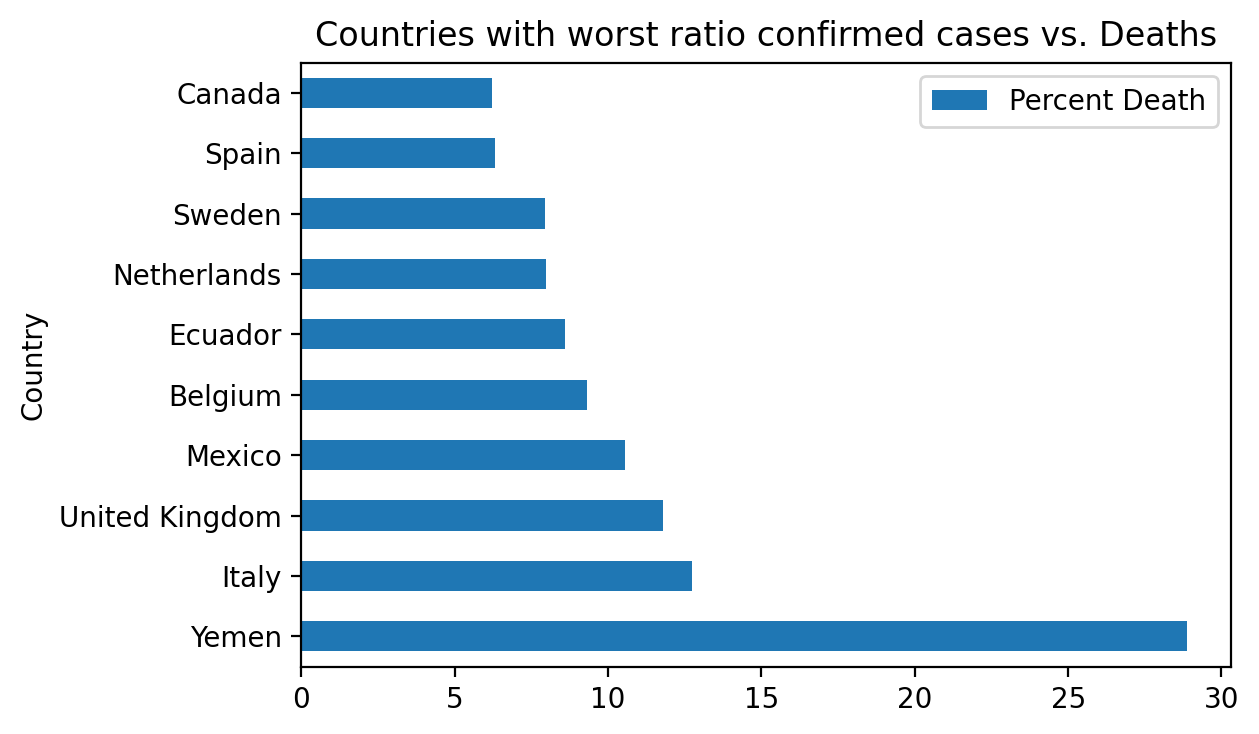

In [58]:
#create barplot
se = df_country[['Country', 'Percent Death']].sort_values(by = "Percent Death", ascending = False).set_index("Country").head(10)
#se = se[0:10].sort_values(by = "Percent Death", ascending = True)
se.plot.barh()
plt.title("Countries with worst ratio confirmed cases vs. Deaths")
plt.xticks(rotation=0);

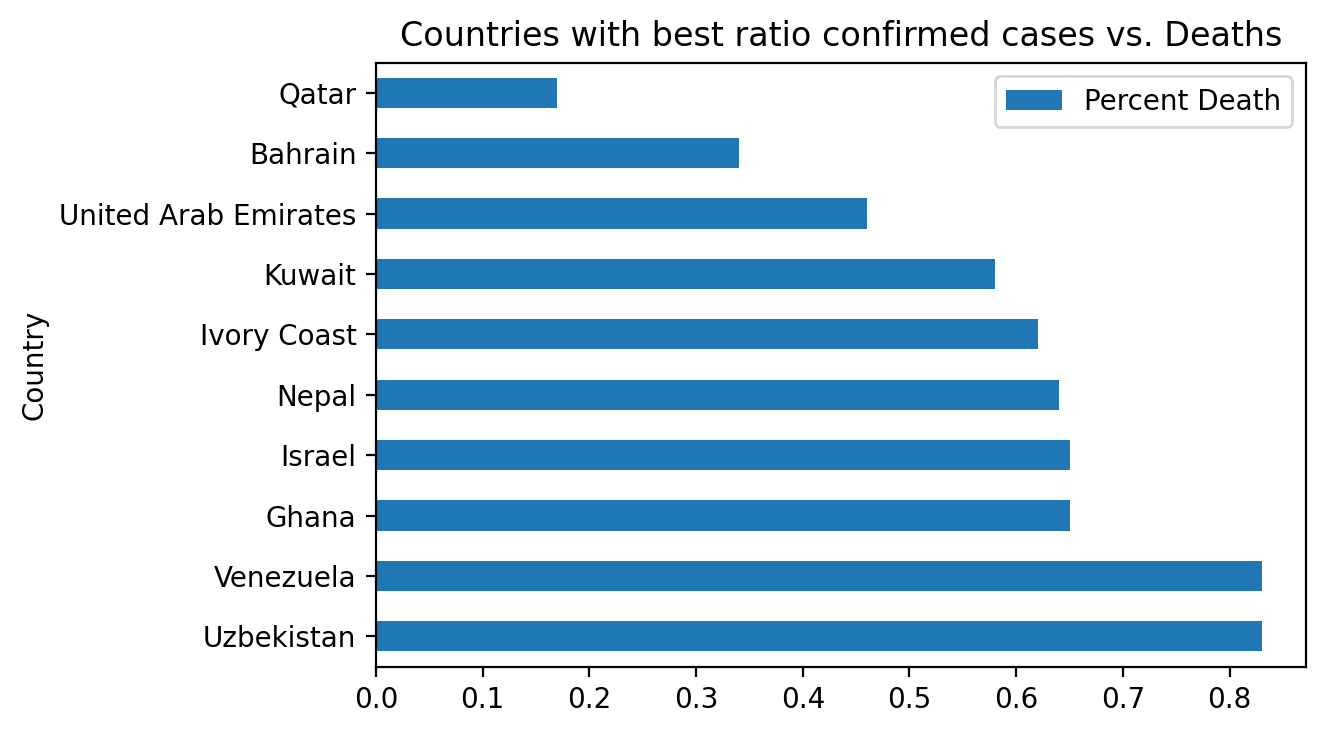

In [61]:
be = df_country[['Country', 'Percent Death']].sort_values(by = "Percent Death", ascending = False).set_index("Country").tail(10)
#se = se[0:10].sort_values(by = "Percent Death", ascending = True)
be.plot.barh()
plt.title("Countries with best ratio confirmed cases vs. Deaths")
plt.xticks(rotation=0);

,Percent Death
Country,
Yemen,28.88
Italy,12.74
United Kingdom,11.78
Mexico,10.56
Belgium,9.32
...,...
Ivory Coast,0.62
Kuwait,0.58
United Arab Emirates,0.46
